In [1]:
path = "D:/Data Science/DS Prac/EDA/Project Datasets/attachment_Project_1_NYC-Flight_data/Project_1_NYC-Flight data/"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
flight = pd.read_csv(path+"flight_data.csv")
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [4]:
flight.isnull().any()

year              False
month             False
day               False
dep_time           True
sched_dep_time    False
dep_delay          True
arr_time           True
sched_arr_time    False
arr_delay          True
carrier           False
flight            False
tailnum            True
origin            False
dest              False
air_time           True
distance          False
hour              False
minute            False
time_hour         False
dtype: bool

In [5]:
flight_df = pd.DataFrame({'year':flight.year,
                           'month':flight.month,
                           'day':flight.day,
                          'dep_time':flight['dep_time'].fillna(flight['dep_time'].mean()),
                          'sched_dep_time':flight.sched_dep_time,
                          'dep_delay':flight['dep_delay'].fillna(flight['dep_delay'].mean()),
                          'arr_time':flight['arr_time'].fillna(flight['arr_time'].mean()),
                          'sched_arr_time':flight.sched_arr_time,
                          'arr_delay':flight['arr_delay'].fillna(flight['arr_delay'].mean()),
                          'carrier':flight.carrier,
                          'flight':flight['flight'],
                          'tailnum':flight['tailnum'].fillna(0),
                          'origin':flight.origin,
                          'dest':flight.dest,
                          'air_time':flight['air_time'].fillna(flight['air_time'].mean()),
                          'distance':flight.distance,
                          'hour':flight.hour,
                          'minute':flight.minute,
                          'time_hour':flight.time_hour}, 
                          columns=['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay','arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight','tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute','time_hour'])

flight_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [6]:
flight_df.isnull().any()

year              False
month             False
day               False
dep_time          False
sched_dep_time    False
dep_delay         False
arr_time          False
sched_arr_time    False
arr_delay         False
carrier           False
flight            False
tailnum           False
origin            False
dest              False
air_time          False
distance          False
hour              False
minute            False
time_hour         False
dtype: bool

In [7]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          336776 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           336776 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [8]:
flight_df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,482.260302,467.335756,39.714191,526.320657,497.457142,44.003969,1632.471938,92.367314,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,915.000000,906.000000,-5.000000,1110.000000,1124.000000,-16.000000,553.000000,84.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1349.109947,1359.000000,-1.000000,1518.000000,1556.000000,-4.000000,1496.000000,132.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1737.000000,1729.000000,12.639070,1934.000000,1945.000000,13.000000,3465.000000,188.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [9]:
#Delays in departure per day
delayed_dep = flight_df[flight_df['dep_time'] > flight_df['sched_dep_time']]
delayed_dep_pivot = pd.pivot_table(delayed_dep, index=['month','day'], values=['dep_delay'], aggfunc='count')
delayed_dep_pivot

dep_delay
month day           
1     1          352
      2          450
      3          420
      4          392
      5          267
      6          354
      7          298
      8          247
      9          207
      10         190
      11         235
      12         177
      13         357
      14         242
      15         173
      16         520
      17         319
      18         317
      19         186
      20         229
      21         277
      22         352
      23         301
      24         457
      25         418
      26         262
      27         289
      28         400
      29         201
      30         425
...              ...
12    2          383
      3          359
      4          318
      5          544
      6          480
      7          228
      8          422
      9          625
      10         541
      11         361
      12         398
      13         355
      14         366
      15         513
      16         461
      17         647
      18         583
      19         585
      20         541
      21         492
      22         584
      23         670
      24         310
      25         273
      26         481
      27         448
      28         344
      29         489
      30         420
      31         286

[365 rows x 1 columns]

In [10]:
#Plotting month which encountered enormous number of delays in departure
delayed_dep_plot = delayed_dep.month.apply(lambda x: calendar.month_abbr[x])

Jul    13918
Dec    13887
Jun    12692
Aug    11754
Mar    11426
May    11344
Apr    10587
Jan     9815
Feb     9607
Oct     8782
Nov     8354
Sep     7883
Name: month, dtype: int64


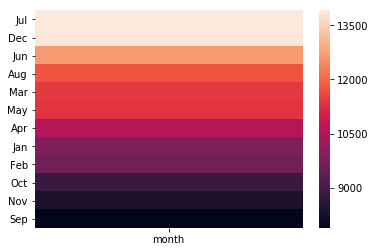

In [11]:
plot = delayed_dep_plot.value_counts()
print (plot)
plot_df = pd.DataFrame(plot)
sns.heatmap(plot_df, cmap="rocket")

{'boxes': [<matplotlib.lines.Line2D at 0x26cc406fba8>],
 'caps': [<matplotlib.lines.Line2D at 0x26cc40785f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x26cc40802b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26cc4078e48>],
 'whiskers': [<matplotlib.lines.Line2D at 0x26cc406fcf8>,
  <matplotlib.lines.Line2D at 0x26cc40781d0>]}

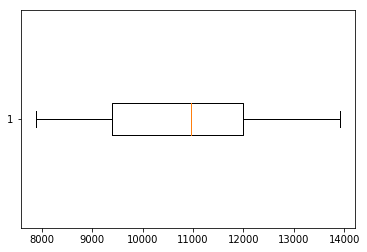

In [12]:
plt.boxplot(plot_df.values, 0, 'rs', 0, 0.75)

In [13]:
#Delays in arrival per day
delayed_arr = flight_df[flight_df['arr_time'] > flight_df['sched_arr_time']]
delayed_arr_pivot = pd.pivot_table(delayed_arr, index=['month','day'], values=['arr_delay'], aggfunc='count')
delayed_arr_pivot

arr_delay
month day           
1     1          459
      2          531
      3          466
      4          293
      5          235
      6          373
      7          240
      8          281
      9          287
      10         219
      11         239
      12         115
      13         333
      14         422
      15         372
      16         666
      17         448
      18         358
      19         127
      20         296
      21         376
      22         460
      23         381
      24         460
      25         466
      26         244
      27         246
      28         394
      29         207
      30         444
...              ...
12    2          327
      3          405
      4          348
      5          591
      6          589
      7          306
      8          516
      9          721
      10         706
      11         566
      12         448
      13         345
      14         436
      15         488
      16         454
      17         771
      18         550
      19         458
      20         514
      21         403
      22         524
      23         628
      24         291
      25         192
      26         410
      27         355
      28         252
      29         435
      30         476
      31         386

[365 rows x 1 columns]

In [14]:
#Plotting month which encountered enormous number of delays in arrivals
delayed_arr_plot = delayed_arr.month.apply(lambda x: calendar.month_abbr[x])

Dec    14185
Jul    12642
Apr    12177
Jun    11950
Aug    11464
Jan    11030
Mar    10768
Feb    10365
May    10026
Oct     9701
Nov     9558
Sep     6784
Name: month, dtype: int64


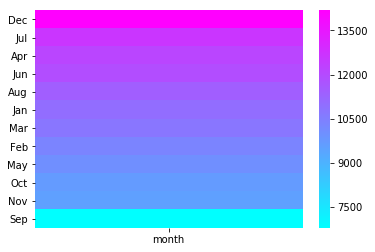

In [15]:
plot_2 = delayed_arr_plot.value_counts()
print (plot_2)
plot_df_2 = pd.DataFrame(plot_2)
sns.heatmap(plot_df_2, cmap="cool")

{'boxes': [<matplotlib.lines.Line2D at 0x26cc90f5c18>],
 'caps': [<matplotlib.lines.Line2D at 0x26cc90fc668>,
 'fliers': [<matplotlib.lines.Line2D at 0x26cc9105320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26cc90fceb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x26cc90f5d68>,
  <matplotlib.lines.Line2D at 0x26cc90fc240>]}

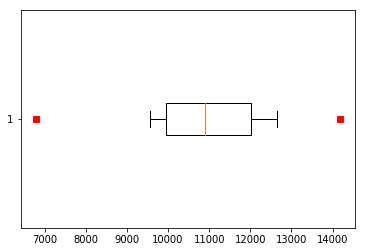

In [16]:
plt.boxplot(plot_df_2.values, 0, 'rs', 0, 0.75)

In [17]:
#flights travelled from destination A to destination B (on monthly basis)
travel = pd.pivot_table(flight_df, index=['month','origin','dest'], values=['day'], aggfunc='count')
travel

day
month origin dest     
1     EWR    ALB    64
             ATL   362
             AUS    51
             AVL     2
             BDL    37
             BNA   111
             BOS   430
             BQN    31
             BTV   100
             BUF   119
             BWI   176
             BZN     4
             CAE     9
             CHS    87
             CLE   177
             CLT   381
             CMH    32
             CVG   222
             DAY    80
             DCA   227
             DEN   217
             DFW   307
             DSM    27
             DTW   265
             EGE    31
             FLL   370
             GRR    76
             GSO    88
             GSP    57
             HDN     4
...                ...
12    LGA    JAX    30
             MCI    12
             MCO   325
             MDW   177
             MEM    51
             MHT     9
             MIA   575
             MKE   152
             MSN    48
             MSP   312
             MSY    80
             OMA    20
             ORD   637
             ORF    40
             PBI   312
             PHL    71
             PIT    89
             PWM    10
             RDU   279
             RIC    86
             ROC    54
             RSW    93
             SAV     5
             SDF    24
             SRQ    63
             STL   187
             SYR    57
             TPA   187
             TYS    27
             XNA    42

[2313 rows x 1 columns]

In [18]:
#Number of flights that took off from JFK every month
jfk_origin = flight_df[flight_df.origin == 'JFK']
jfk_origin_count = jfk_origin.month.apply(lambda x: calendar.month_abbr[x]).value_counts()
jfk_origin_count

Jul    10023
Aug     9983
Mar     9697
Jun     9472
May     9397
Apr     9218
Jan     9161
Dec     9146
Oct     9143
Sep     8908
Nov     8710
Feb     8421
Name: month, dtype: int64

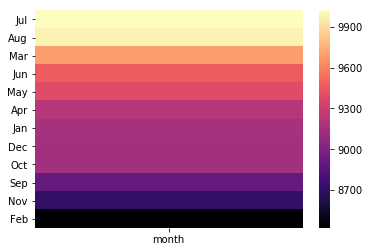

In [19]:
sns.heatmap(pd.DataFrame(jfk_origin_count), cmap="magma")

In [20]:
#Number of flights that had JFK as destination
jfk_dest = flight_df[flight_df.dest == 'JFK']
jfk_dest
#No flight had destination JFK

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour


In [21]:
#carrier outliers (yearly)
co = pd.pivot_table(flight_df, index=['carrier'], values=['month'], aggfunc='count')
co.reset_index(inplace=True)
print (co)
co.describe()

   carrier  month
0       9E  18460
1       AA  32729
2       AS    714
3       B6  54635
4       DL  48110
5       EV  54173
6       F9    685
7       FL   3260
8       HA    342
9       MQ  26397
10      OO     32
11      UA  58665
12      US  20536
13      VX   5162
14      WN  12275
15      YV    601


,month
count,16.000000
mean,21048.500000
std,22071.274647
min,32.000000
25%,706.750000
50%,15367.500000
75%,36574.250000
max,58665.000000


   carrier  month
0       9E  18460
1       AA  32729
3       B6  54635
4       DL  48110
5       EV  54173
9       MQ  26397
11      UA  58665
12      US  20536


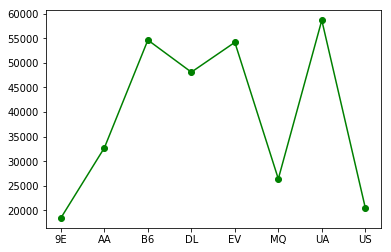

In [22]:
#lets find out outliers (Considering 50% and above)
carr_out = co[co['month'] > 15367]
print (carr_out)
plt.plot(carr_out.carrier, carr_out.month,color='g', marker='o')

{'boxes': [<matplotlib.lines.Line2D at 0x26ccf34fb00>],
 'caps': [<matplotlib.lines.Line2D at 0x26ccf34f0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26ccf348438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26ccf348860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x26ccf34f9b0>,
  <matplotlib.lines.Line2D at 0x26ccf34f518>]}

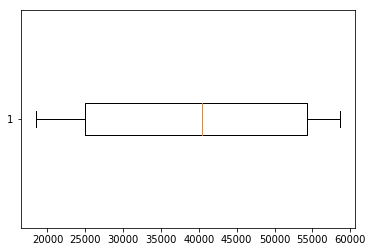

In [23]:
plt.boxplot(carr_out.month,0, 'rs', 0, 0.75)

Jul    29425
Aug    29327
Oct    28889
Mar    28834
May    28796
Apr    28330
Jun    28243
Dec    28135
Sep    27574
Nov    27268
Jan    27004
Feb    24951
Name: month, dtype: int64


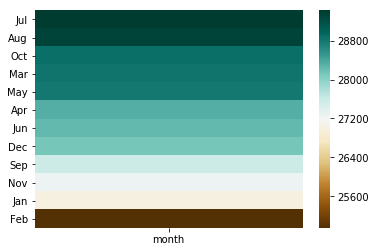

In [24]:
#months in which JFK experiences enormous number of travellers
month = flight_df['month'].apply(lambda x: calendar.month_abbr[x])
monthly_flights = month.value_counts()
print (monthly_flights)
sns.heatmap(pd.DataFrame(monthly_flights), cmap="BrBG")

Text(0.5,1,'Departure V/S Arrival (Delay)')

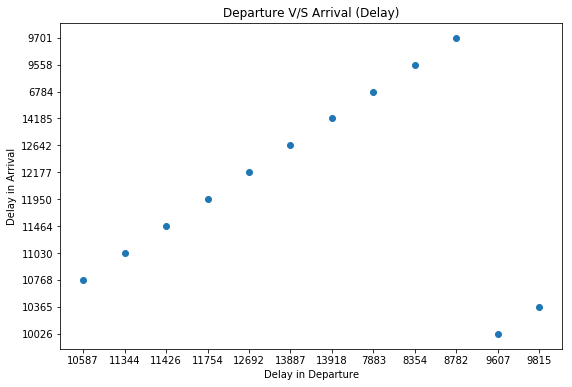

In [25]:
#comparing delayed departure and delayed arrival
fig = plt.figure(1, figsize=(9, 6))
plt.scatter(plot_df, plot_df_2)
plt.xlabel("Delay in Departure")
plt.ylabel("Delay in Arrival")
plt.title("Departure V/S Arrival (Delay)")

In [26]:
#finding out which airplane (having its unique tailnum_ travelled to different destinations from respectibe origin 
tailnum = pd.pivot_table(flight_df, index=['tailnum','origin','dest','flight'], values=['air_time'])
tailnum

air_time
tailnum origin dest flight            
0       EWR    AUS  205     150.686460
                    237     150.686460
                    503     150.686460
                    643     150.686460
                    910     150.686460
                    1483    150.686460
                    3085    150.686460
               BDL  522     150.686460
               BNA  1975    150.686460
               BOS  214     150.686460
                    215     150.686460
                    216     150.686460
                    244     150.686460
                    252     150.686460
                    256     150.686460
                    330     150.686460
                    385     150.686460
                    424     150.686460
                    437     150.686460
                    531     150.686460
                    561     150.686460
                    570     150.686460
                    628     150.686460
                    646     150.686460
                    655     150.686460
                    733     150.686460
                    736     150.686460
                    884     150.686460
                    994     150.686460
                    1066    150.686460
...                                ...
N9EAMQ  LGA    CLT  4582     87.666667
                    4584     80.666667
               CMH  3281     92.000000
                    3407     74.000000
                    3526     96.895487
                    4626     81.666667
               DTW  2810     93.000000
                    3351     89.000000
                    3478     87.000000
                    3556     78.000000
                    3689     78.333333
                    4589     83.000000
               MSP  3349    144.895487
                    3588    158.571429
                    3599    148.228820
                    3616    157.000000
                    4588    144.666667
                    4599    139.000000
                    4646    146.333333
                    4649    157.000000
               RDU  3301     74.000000
                    3305     65.000000
                    3317     64.800000
                    3416     65.600000
                    3466     63.500000
                    4605     63.000000
                    4617     61.000000
               STL  2809    158.000000
                    2840    144.000000
                    2876    156.000000

[186868 rows x 1 columns]

In [27]:
avg_airtime = pd.pivot_table(flight_df, index=['tailnum'], values=['air_time'])
avg_airtime

,air_time
tailnum,
0,150.686460
D942DN,134.750000
N0EGMQ,106.223835
N10156,117.218900
N102UW,82.812500
N103US,83.347826
N104UW,82.823116
N10575,90.116710
N105UW,82.288889


In [56]:
#the plane which spent max/min time in air
print (avg_airtime.idxmax(), avg_airtime.max())

print (avg_airtime.idxmin(), avg_airtime.min())

air_time    N395HA
dtype: object air_time    632.142857
dtype: float64
air_time    N956UW
dtype: object air_time    38.081081
dtype: float64
